In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
#stemming
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
#is based on The Porter Stemming Algorithm

#spell check
#from autocorrect import Speller

from wordcloud import WordCloud

#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

['englsih_reviews.csv', 'listings.csv', 'processed_reviews.csv', 'raw', 'reviews_polarity.csv', 'transformed_calendar.csv', 'transformed_listings.csv', 'viz_district_map.geojson']


## Data import - english reviews csv

In [3]:
dataset = pd.read_csv('./vienna_data/englsih_reviews.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309110 entries, 0 to 309109
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   listing_id     309110 non-null  int64  
 1   reviewer_id    309110 non-null  int64  
 2   comments       309110 non-null  object 
 3   Compound       309110 non-null  float64
 4   english_words  309110 non-null  int64  
 5   total_words    309110 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 14.2+ MB


In [5]:
dataset.head()

,listing_id,reviewer_id,comments,Compound,english_words,total_words
0,15883,30537860,If you need a clean comfortable place to stay...,94.80,78,84
1,15883,37529754,It's so nice to be in the house It's a peace ...,96.04,23,24
2,15883,3147341,A beautiful place uniquely decorated showing ...,92.98,60,63
3,15883,36016357,It was a very pleasant stay Excellent locatio...,92.08,13,13
4,15883,5706500,Eva's place is the perfect place to stay while...,77.13,32,38


Remove the last 2 columns as they are not necessary anymore.

In [6]:
dataset.drop(['english_words', 'total_words'], axis = 1, inplace = True)

The dataset will be split into 3 different datasets based on the compound metric as to generate 3 different word clouds:
+ positive sentiment: compound score >= 5
+ negative sentiment: compound score <= -5
+ neutral sentiment: compound score between -5 and 5

The scoring method related to the "compound" metric can be seen [here](https://github.com/cjhutto/vaderSentiment#about-the-scoring).

In [7]:
dataset.isna().sum()

listing_id     0
reviewer_id    0
comments       0
Compound       0
dtype: int64

In [8]:
300247 / 309110

0.9713273591925204

In [9]:
print("Numărul total de recenzii în engleză: ", len(dataset))
negative = pd.DataFrame(dataset[dataset.Compound <= -5])
print("Numărul și proporția din total a recenziilor negative: ", len(negative), f", {round( (len(negative)/len(dataset))*100 , 2)}%")
positive = pd.DataFrame(dataset[dataset.Compound >= 5])
print("Numărul și proporția din total a recenziilor pozitive: ",len(positive), f", {round( (len(positive)/len(dataset))*100 , 2)}%")
neutral = pd.DataFrame(dataset[(dataset.Compound > -5) & (dataset.Compound < 5)])
print("Numărul și proporția din total a recenziilor neutre: ",len(neutral), f", {round( (len(neutral)/len(dataset))*100 , 2)}%")

Numărul total de recenzii în engleză:  309110
Numărul și proporția din total a recenziilor negative:  4825 , 1.56%
Numărul și proporția din total a recenziilor pozitive:  300247 , 97.13%
Numărul și proporția din total a recenziilor neutre:  4038 , 1.31%


## Word Clouds

In [10]:
text = " ".join(w for w in neutral.comments)
print('Total words from dataset: ', len(text))

Total words from dataset:  369559


In [12]:
type(text)

str

In [13]:
def WordCloud_comments(df):
    """Primește coloana "comments" din dataframe 
    și generează wordcloud pe baza acesteia """
    
    text = " ".join(w for w in df.comments)
    print('Total words from dataset: ', len(text))
    
    print('Tokenize and lowercase text..')
    tokens = nltk.tokenize.word_tokenize(text)
    tokens =  [w.lower() for w in tokens]
    
    print('Remove punctuation and non-alphabetic tokens...')
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [w for w in stripped if w.isalpha()]

    print('POS-tag and Lemmatize words...')
    lemmaWords = []
    wordnet_lemmatizer = WordNetLemmatizer()
    for word,tag in pos_tag(words):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        lemma = wordnet_lemmatizer.lemmatize(word, wntag) if wntag else word
        lemmaWords.append(lemma)

    print('Filter out stop words...')
    stop_words = set(stopwords.words('english'))
    stop_words.update(['wa', 'nt', 'ha','doe','pm','elxe','u','however' , 
                       'apartment','vienna','would','could','still','stay',
                       'airbnblocation','way','even','get','actually',
                       'quite','thing','airbnb','ok','one','also','without',
                       'two','first','us','go','say','see'])
    filterWords = [w for w in lemmaWords if not w in stop_words]
    print(f"Wordclud with {len(filterWords)} words")
    print('WordClouding ...!')
    WordCloudText = " ".join(w for w in filterWords)

    Word_cloud = WordCloud(stopwords=stop_words, background_color="white",  width=800, height = 400).generate(WordCloudText)
    return Word_cloud
    

### Negative

In [14]:
negativeWordcloud = WordCloud_comments(negative)

Total words from dataset:  2000378
Tokenize and lowercase text..
Remove punctuation and non-alphabetic tokens...
POS-tag and Lemmatize words...
Filter out stop words...
Wordclud with 154369 words
WordClouding ...!


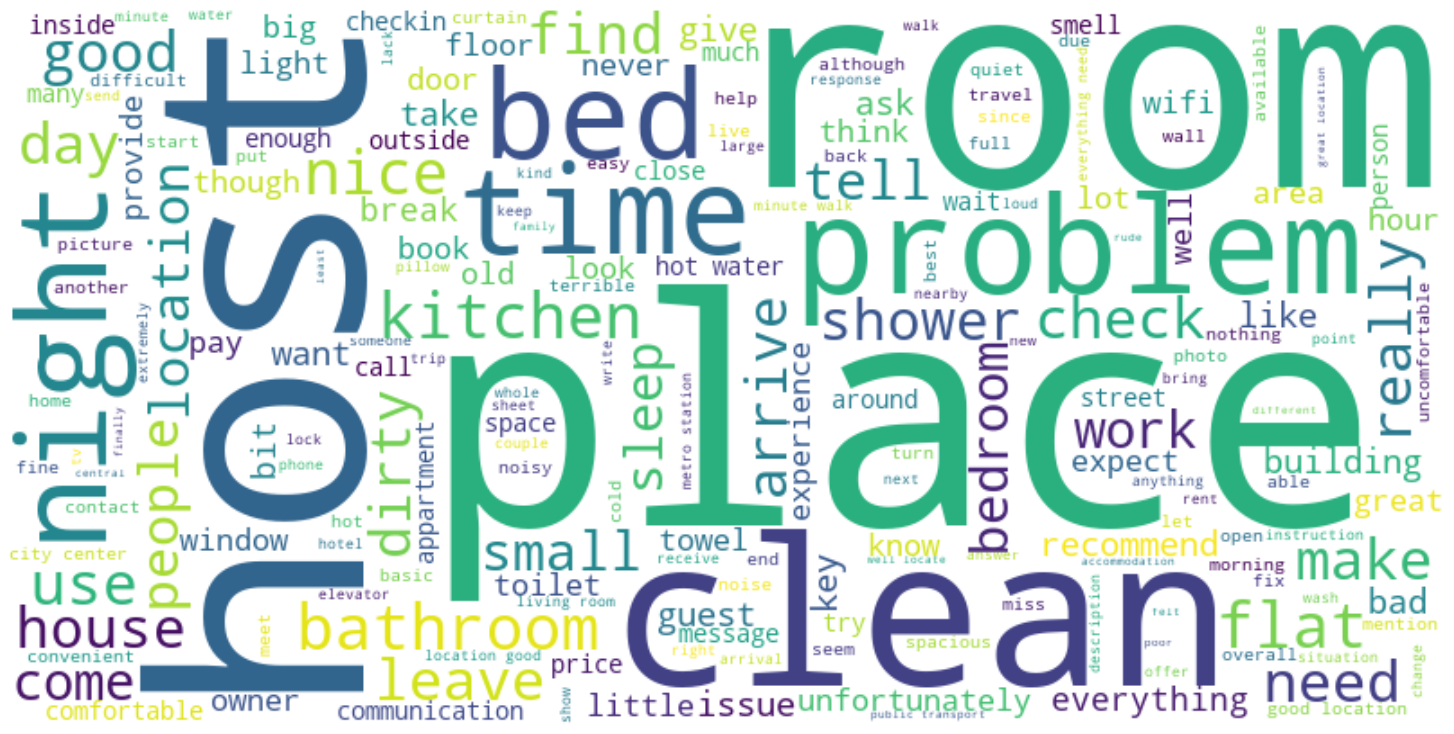

In [15]:
plt.figure(figsize=(20,11))
plt.imshow(negativeWordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.savefig("WordCloud300-negative.png", format="png",dpi = 300)

plt.show()

### Positive

In [15]:
positiveWordcloud = WordCloud_comments(positive)

Total words from dataset:  76228438
Tokenize and lowercase text..
Remove punctuation and non-alphabetic tokens...
POS-tag and Lemmatize words...
Filter out stop words...
Wordclud with 6198505 words
WordClouding ...!


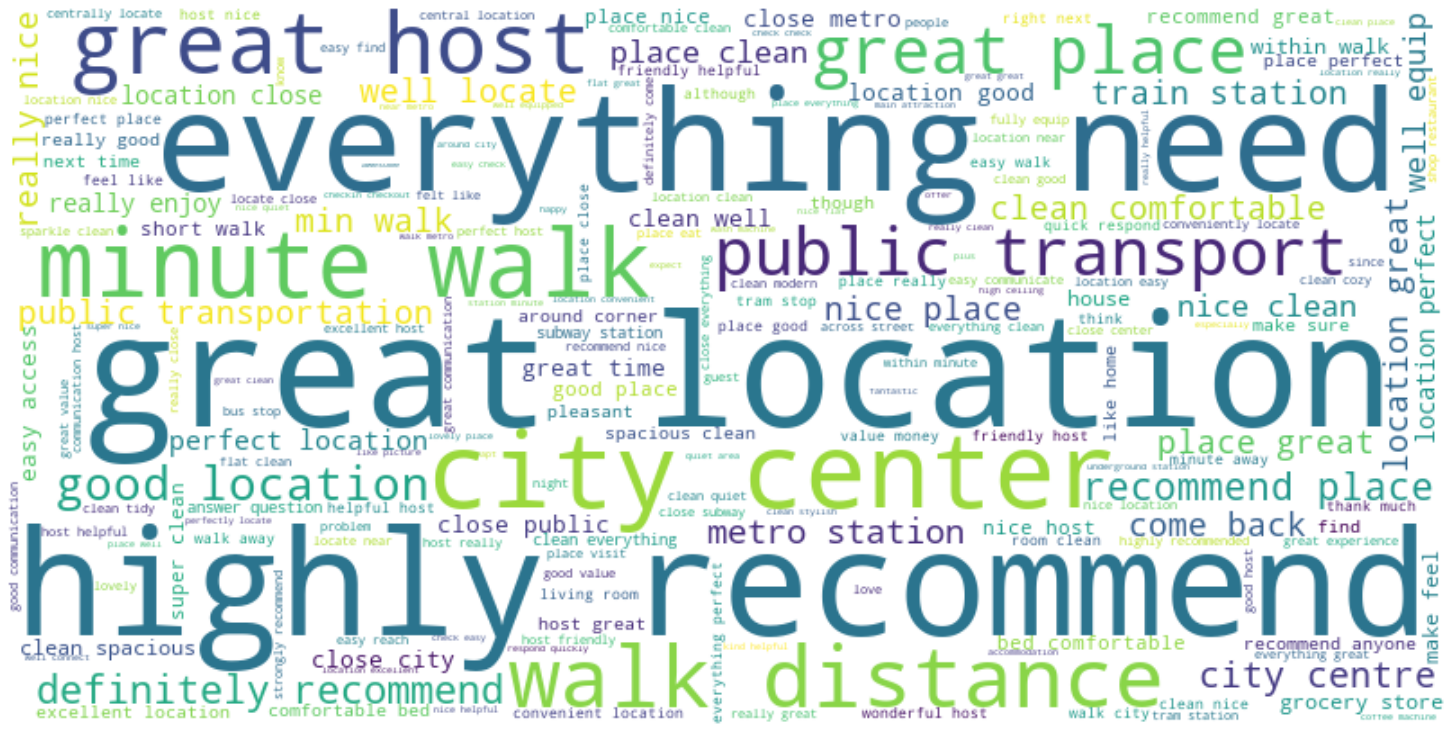

In [17]:
plt.figure(figsize=(20,11))
plt.imshow(positiveWordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.savefig("WordCloud300-positive.png", format="png",dpi = 300)

plt.show()

### Neutral

In [16]:
neutralWordcloud = WordCloud_comments(neutral)

Total words from dataset:  369559
Tokenize and lowercase text..
Remove punctuation and non-alphabetic tokens...
POS-tag and Lemmatize words...
Filter out stop words...
Wordclud with 30398 words
WordClouding ...!


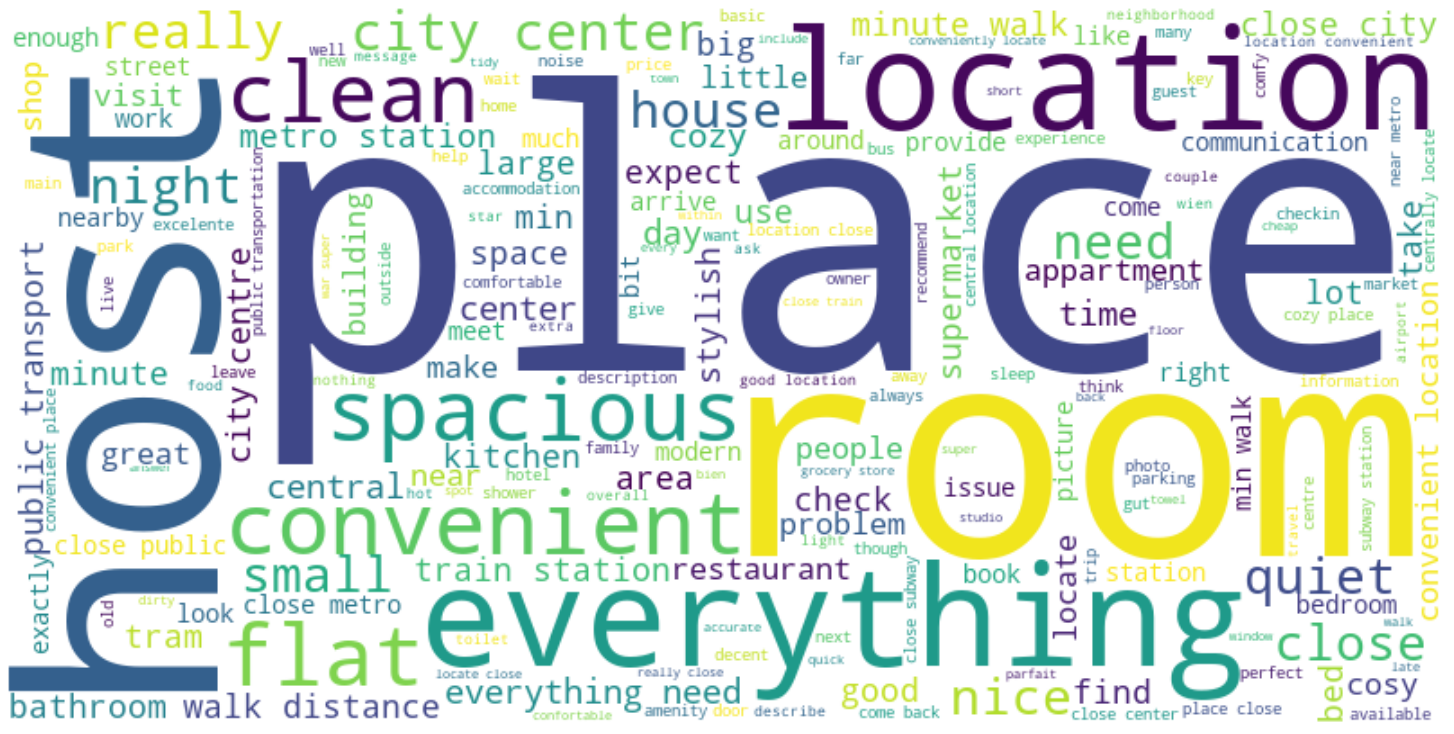

In [13]:
plt.figure(figsize=(20,11))
plt.imshow(neutralWordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.savefig("WordCloud300-neutral.png", format="png",dpi = 300)

plt.show()